Running comparison


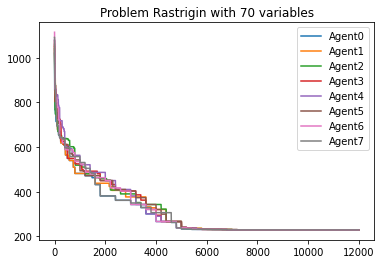

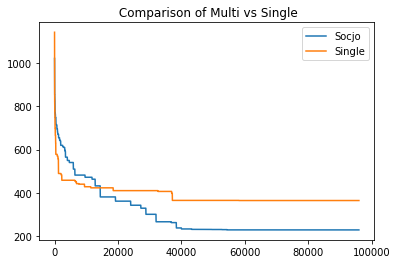

Running comparison


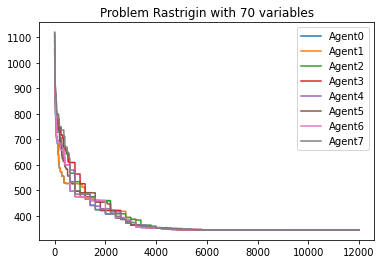

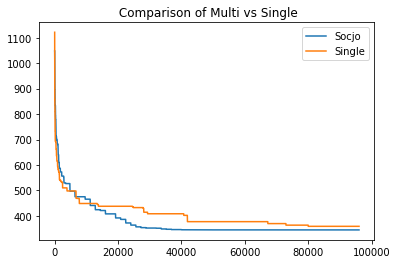

Running comparison


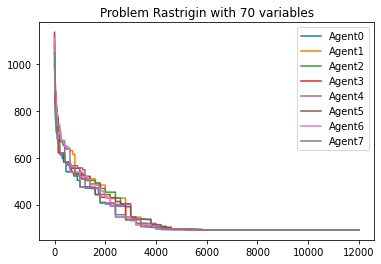

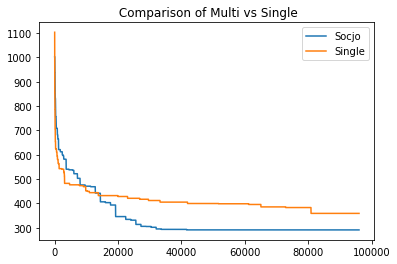

Running comparison


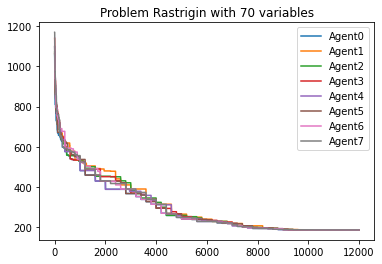

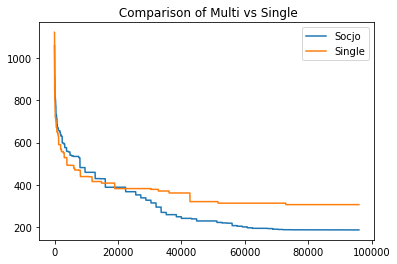

Running comparison


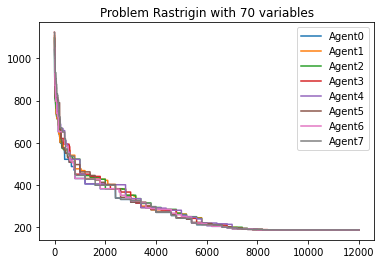

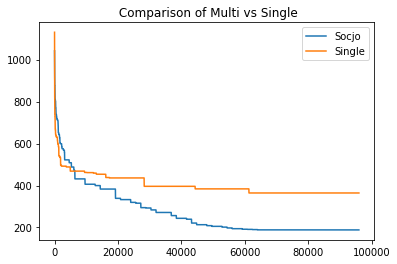

Running comparison


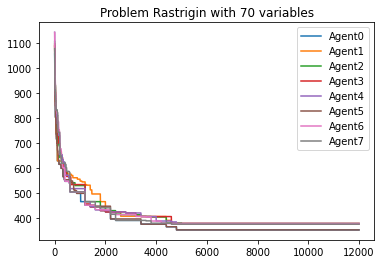

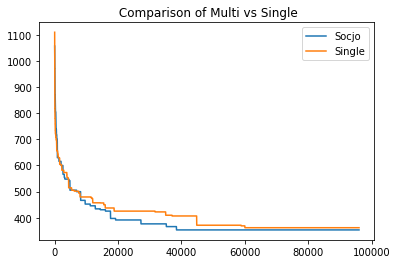

Running comparison


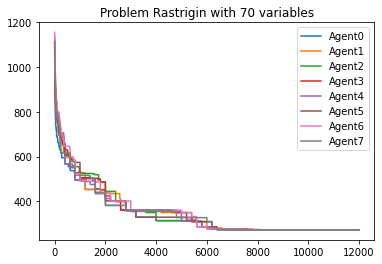

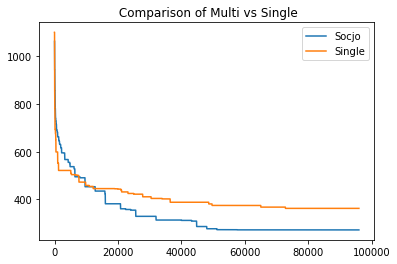

Running comparison


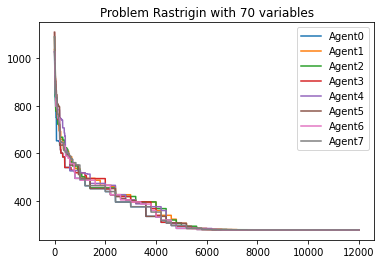

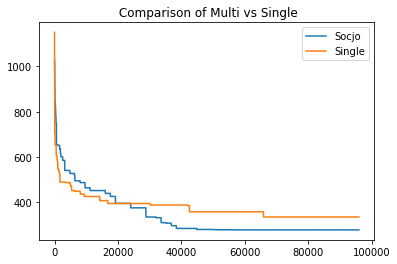

Running comparison


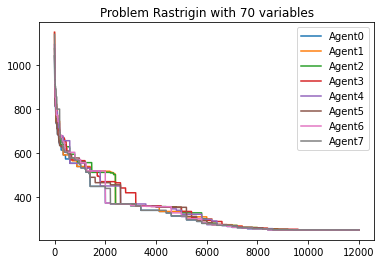

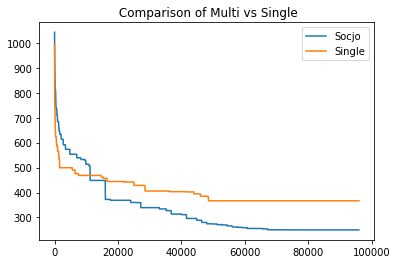

Running comparison


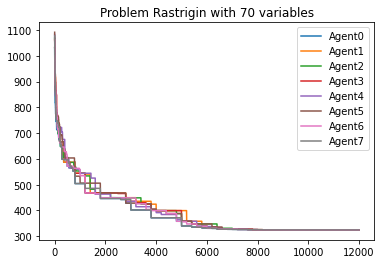

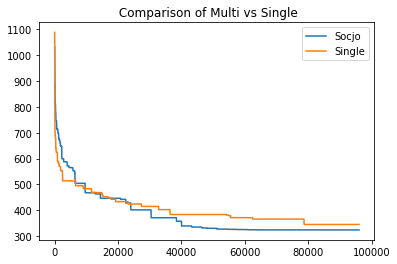

Running comparison


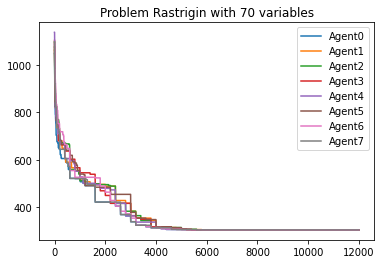

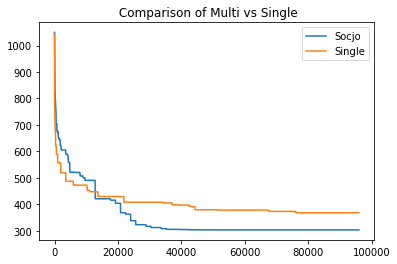

Running comparison


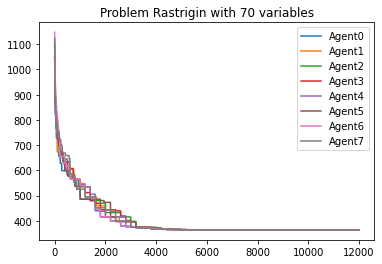

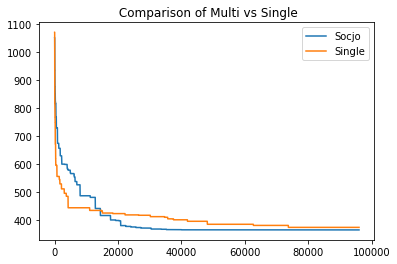

Running comparison


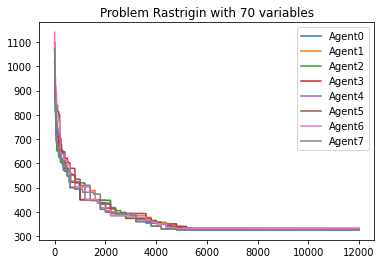

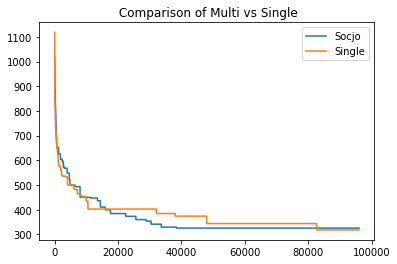

Running comparison


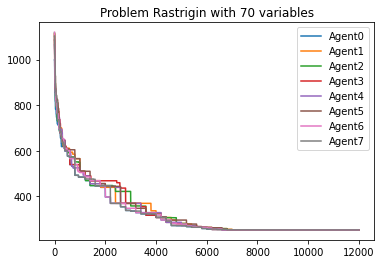

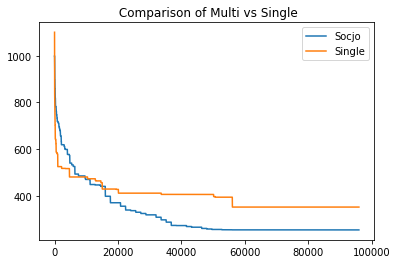

Running comparison


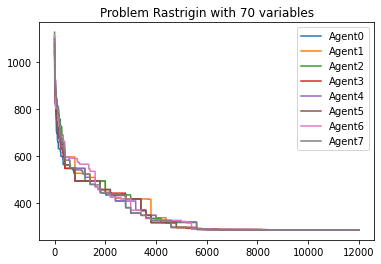

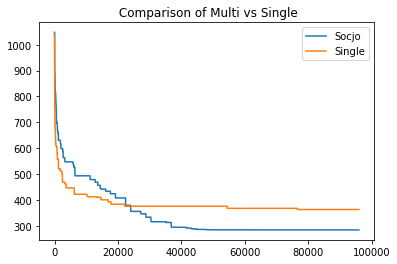

Running comparison


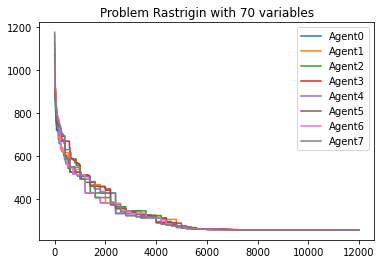

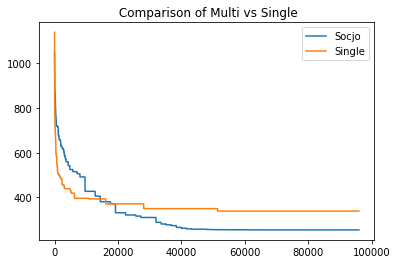

Running comparison


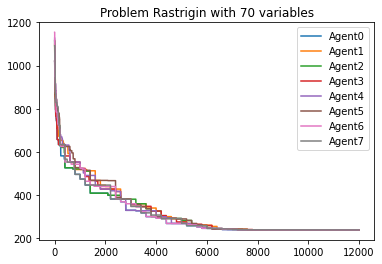

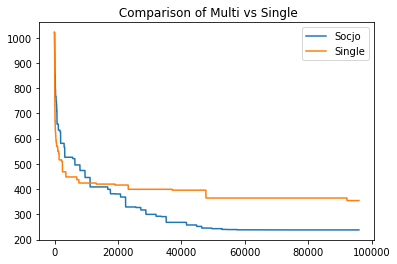

Running comparison


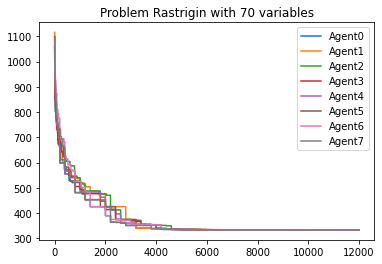

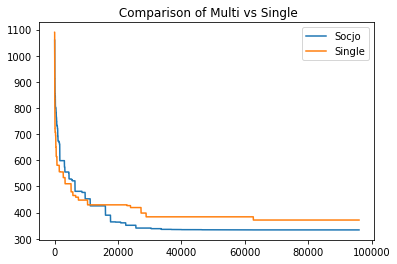

Running comparison


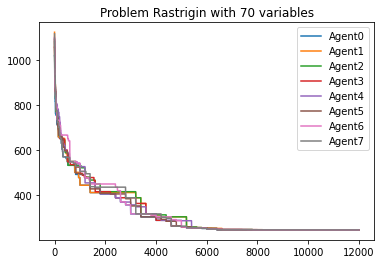

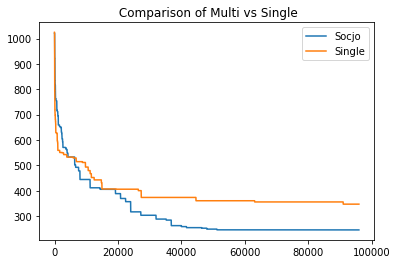

Running comparison


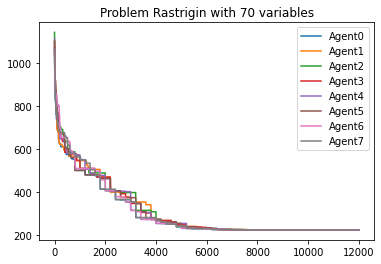

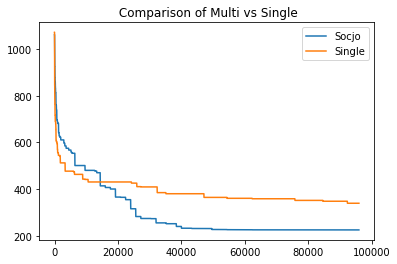

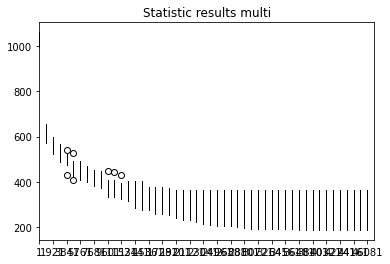

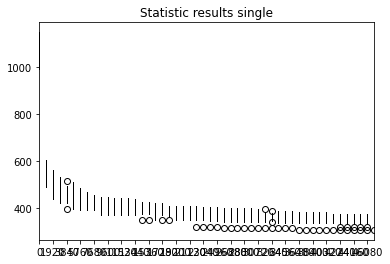

In [1]:
from Evolutionary_algorithm import EvolutionAlgoritm
from jmetal.operator import SBXCrossover, PolynomialMutation, BinaryTournamentSelection
from jmetal.problem.singleobjective.unconstrained import Rastrigin, Sphere, OneMax
from jmetal.util.termination_criterion import StoppingByEvaluations
from Island import Island
from random import randint
from Agent import Agent
from Executor import MultiAgentRunner
from communication import AttiduteType
from StatisticRunner import StatisticRunner
from communication import CommunicationBasic

problem = Rastrigin(number_of_variables = 70)


Agents =  []
for i in range(0,8):
    Island1 = Island(algorithm=EvolutionAlgoritm(
    problem=problem, 
    population_size=50 -2*i,
    offspring_population_size= 100 -8*i,
    mutation=PolynomialMutation(probability=0.5 + 0.03*i / problem.number_of_variables, distribution_index=20 +i),
    crossover= SBXCrossover(probability=0.04 * i + 0.01),
    selection= BinaryTournamentSelection(),
    termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
    Island1.start()
    Agents.append(Agent(Island1, name= f"Agent{i}", attidute= AttiduteType(i % 3), communication_type=CommunicationBasic()))

i = 5

Island2 = Island(algorithm=EvolutionAlgoritm(
problem=problem, 
population_size=50 -2*i,
offspring_population_size= 100 -8*i,
mutation=PolynomialMutation(probability=0.5 + 0.01*i / problem.number_of_variables, distribution_index=20 +i),
crossover= SBXCrossover(probability=0.01 * i + 0.01),
selection= BinaryTournamentSelection(),
termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
Island2.start()
agent_single = Agent(Island2, name= f"Agent single", attidute= AttiduteType(1), communication_type=CommunicationBasic())


runner = MultiAgentRunner(agents= Agents, agent_single= agent_single)

Statistic_runner = StatisticRunner(runner)


Statistic_runner.run_an_collect_data(no_runs = 20, cycles=60, cycle_iter=200, num_of_comm=2)
Statistic_runner.plot()



Running comparison


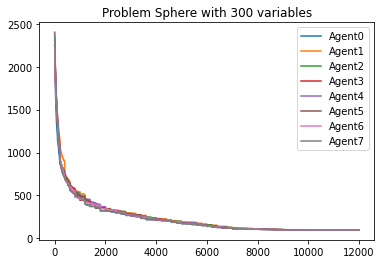

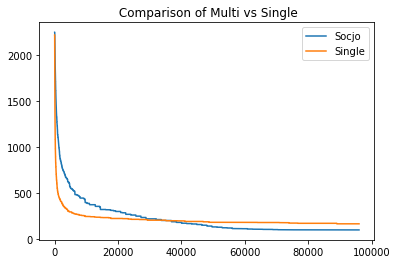

Running comparison


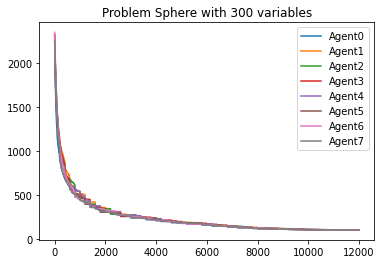

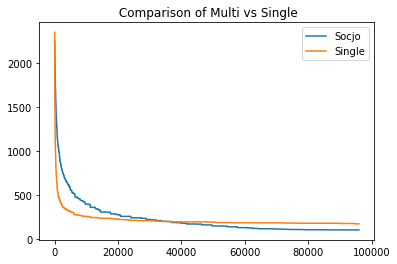

Running comparison


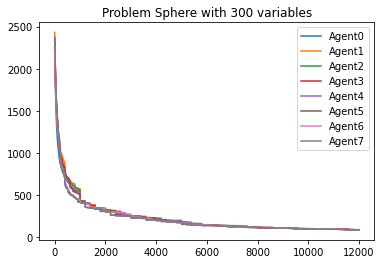

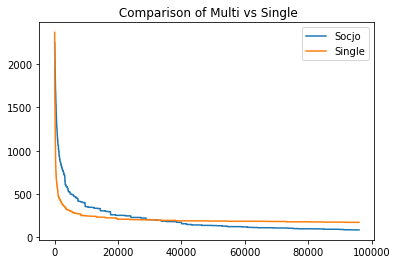

Running comparison


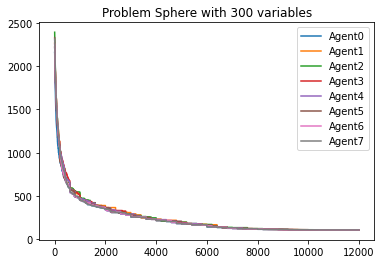

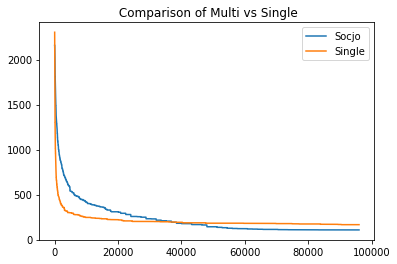

In [2]:
problem = Sphere(number_of_variables = 300)


Agents =  []
for i in range(0,8):
    Island1 = Island(algorithm=EvolutionAlgoritm(
    problem=problem, 
    population_size=50 -2*i,
    offspring_population_size= 100 -8*i,
    mutation=PolynomialMutation(probability=0.5 + 0.03*i / problem.number_of_variables, distribution_index=20 +i),
    crossover= SBXCrossover(probability=0.04 * i + 0.01),
    selection= BinaryTournamentSelection(),
    termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
    Island1.start()
    Agents.append(Agent(Island1, name= f"Agent{i}", attidute= AttiduteType(i % 3), communication_type=CommunicationBasic()))

i = 5

Island2 = Island(algorithm=EvolutionAlgoritm(
problem=problem, 
population_size=50 -2*i,
offspring_population_size= 100 -8*i,
mutation=PolynomialMutation(probability=0.5 + 0.01*i / problem.number_of_variables, distribution_index=20 +i),
crossover= SBXCrossover(probability=0.01 * i + 0.01),
selection= BinaryTournamentSelection(),
termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
Island2.start()
agent_single = Agent(Island2, name= f"Agent single", attidute= AttiduteType(1), communication_type=CommunicationBasic())


runner = MultiAgentRunner(agents= Agents, agent_single= agent_single)

Statistic_runner = StatisticRunner(runner)

Statistic_runner.run_an_collect_data(no_runs = 20, cycles=60, cycle_iter=200, num_of_comm=2)
Statistic_runner.plot()

In [ ]:
problem = OneMax(number_of_bits= 2048)


Agents =  []
for i in range(0,8):
    Island1 = Island(algorithm=EvolutionAlgoritm(
    problem=problem, 
    population_size=50 -2*i,
    offspring_population_size= 100 -8*i,
    mutation=PolynomialMutation(probability=0.5 + 0.03*i / problem.number_of_variables, distribution_index=20 +i),
    crossover= SBXCrossover(probability=0.04 * i + 0.01),
    selection= BinaryTournamentSelection(),
    termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
    Island1.start()
    Agents.append(Agent(Island1, name= f"Agent{i}", attidute= AttiduteType(i % 3), communication_type=CommunicationBasic()))

i = 5

Island2 = Island(algorithm=EvolutionAlgoritm(
problem=problem, 
population_size=50 -2*i,
offspring_population_size= 100 -8*i,
mutation=PolynomialMutation(probability=0.5 + 0.01*i / problem.number_of_variables, distribution_index=20 +i),
crossover= SBXCrossover(probability=0.01 * i + 0.01),
selection= BinaryTournamentSelection(),
termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
Island2.start()
agent_single = Agent(Island2, name= f"Agent single", attidute= AttiduteType(1), communication_type=CommunicationBasic())


runner = MultiAgentRunner(agents= Agents, agent_single= agent_single)

Statistic_runner = StatisticRunner(runner)

Statistic_runner.run_an_collect_data(no_runs = 20, cycles=60, cycle_iter=200, num_of_comm=2)
Statistic_runner.plot()

TypeError: OneMax.__init__() got an unexpected keyword argument 'number_of_variables'